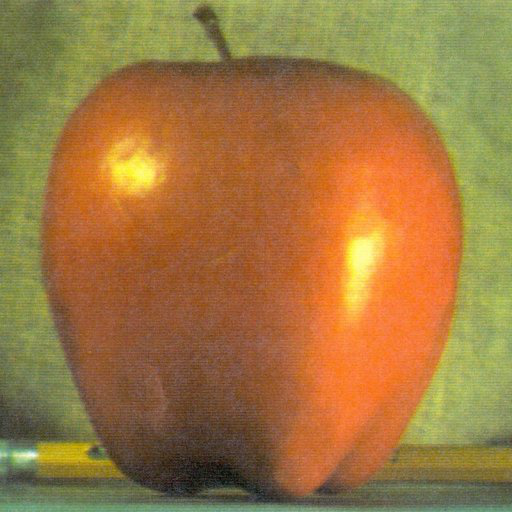

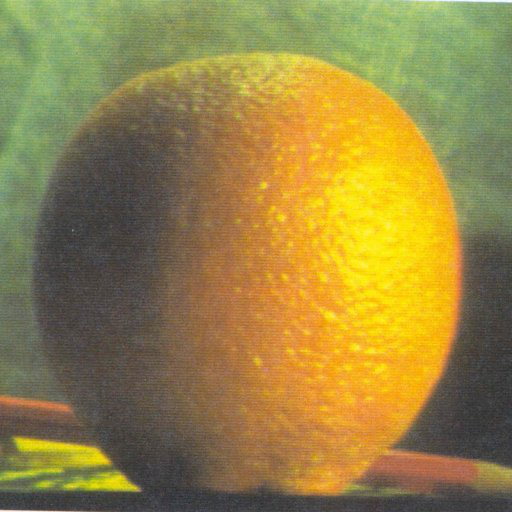

In [9]:
import cv2
import numpy as np,sys
from PIL import Image
from IPython.display import Image as IMG

A = cv2.imread('apple.jpg')
B = cv2.imread('orange.jpg')

display(Image.open('apple.jpg'))
display(Image.open('orange.jpg'))

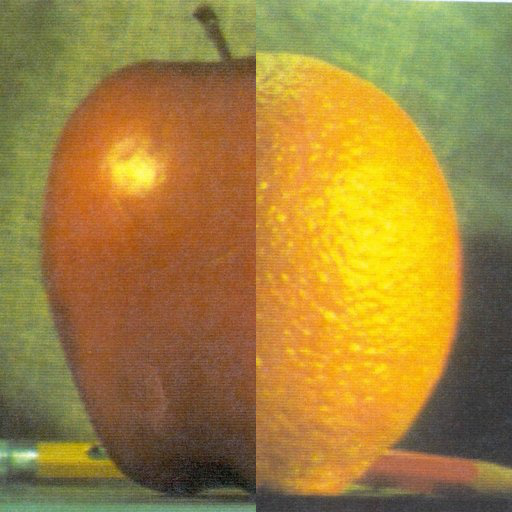

In [7]:
# image with direct connecting each half
rows,cols,dpt = A.shape
real = np.hstack((A[:,:int(cols/2)],B[:,int(cols/2):]))
cv2.imwrite('Direct_blending.jpg',real)

display(Image.open('Direct_blending.jpg'))

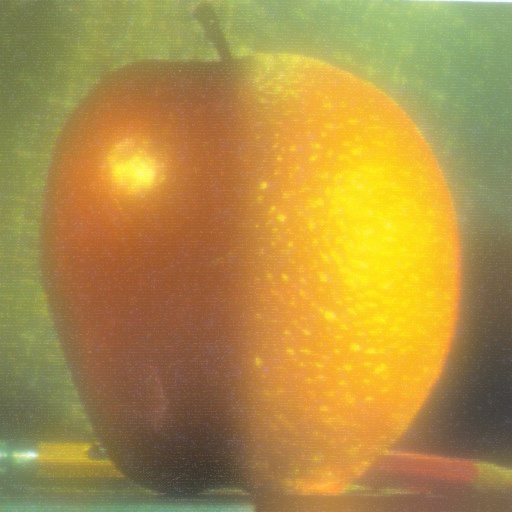

In [8]:
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)

# Now add left and right halves of images in each level
LS = []
ii = 0
for la,lb in zip(lpA,lpB):
    ii=ii+1
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
    cv2.imwrite('py_' + str(ii) + '.jpg', ls)
    LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

cv2.imwrite('Pyramid_blending2.jpg',ls_)

display(Image.open('Pyramid_blending2.jpg'))